## Text Classification and Prediction: Disaster Tweets
S. Michael

Problem Addressed:        To identify social media tweets that are disasters. 

Relevance:       During natural disasters, social media like Twitter and Facebook is widely used by people to post crisis-related messages. These posts represent various kinds of information about the missing and injured and infrastructure damage. Social media analysis has effectively helped manage and mitigate real-time disaster response time (Xiao et al. 2015).

Both uni- and multimodal traditional machine and deep learning algorithms have effectively classified crisis-related tweets of text and imagery data for effective disaster relief and management (Choi and Lee 2019; Li and Caragea 2020). 

My professional roles include building machine learning algorithms with smaller carbon footprints than existing models without compromising performance and social impact. While deep learning multiclass text and image classification models of tweet data (i.e. tweet informativeness, infrastructure damage, damage severity, . . .) have yielded high performance, the Kaggle challenge being considered demands a binary classification of text-only data into disaster or non-disaster: 1 or 0, respectively. 

Studies indicate that deep neural network disater-related social media classification models are preferred when data is vast (Li and Caragea 2020) but traditional, less-resource intensive machine learning algorithms champion social media analysis for disaster management when working with smaller data sets (Choi and Lee 2019). Given the size of the train and test data in this Kaggle competition as well as the computing capacity limitations of my personal laptop, traditional classifiers will be trained, evaluated and used for prediction on the prepared Kaggle test test.

Specific Challenge: Kaggle's nlp-getting-started, Disaster Tweets (Howard, et al 2019)

References:

Choi, W. and Lee, K. (2019). "Conceptual Representation for Crisis-Related Tweet Classification". Computación y Sistemas, 23.4, pp. 1523–1531. https://www.scielo.org.mx/pdf/cys/v23n4/1405-5546-cys-23-04-1523.pdf

Howard, A., devrishi, Culliton, P., and Guo, Y. (2019). "Natural language processing with disaster tweets". Kaggle. https://kaggle.com/competitions/nlp-getting-started

Li, X. and Caragea, D. (2020). "Improving Disaster-related Tweet Classification with a Multimodal Approach". Proceedings of the 17th ISCRAM Conference – Blacksburg, VA. https://par.nsf.gov/servlets/purl/10204504

Xiao, Y., Huang, Q., and Wu, K. (2015). “Understanding social media data for disaster management”. In: Natural
hazards 79.3, pp. 1663–1679.

This notebook:
1. Trains 5 classifiers on labeled Twitter data to model the probability of a tweet representing a true disaster,
2. Uses a test set prepared by Kaggle to model predictions, and
3. Submits three sets of predictions to Kaggle for evaluation by F1 Score

Data Source: https://www.kaggle.com/competitions/nlp-getting-started/data

Steps:
1. Import libraries
2. Download Kaggle nlp-getting-started Data
3. Explore Data, train.csv & test.csv
4. Visualize train Data
5. Preprocess Data
6. Train & Evaluate Model
7. Make Predictions on test_bow & Create Submission Files
8. Challlenges and Future Work

### Import Libraries

In [2]:
#download & read data
import os, csv
#!pip install kaggle
#from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile

#explore data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#preprocess data
import re
import nltk
from nltk.corpus import stopwords, wordnet
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from num2words import num2words
#!pip install autocorrect
from autocorrect import Speller as spell

from sklearn.feature_extraction.text import CountVectorizer

#modeling
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from scipy.stats import uniform as sp_randFloat
from scipy.stats import loguniform
from scipy.stats import randint as sp_randInt

from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, classification_report

### Download Kaggle nlp-getting-started Data

In [24]:
!mkdir ~/.kaggle
!echo '{"username":"sherylmichael","key":"ee2137bd8d95cc0d1f29d42dc871a87d"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: /Users/sherilyn/.kaggle: File exists


In [25]:
#!kaggle competitions download -c nlp-getting-started
!ls

data                    disaster_tweets.ipynb   nlp-getting-started.zip


In [ ]:
# Read train & test data
ZipFile('nlp-getting-started.zip').extractall('data')

In [66]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### Explore Data, train.csv & test.csv

In [219]:
print("train tweets:", train.shape, '\n', train.head())
print("test tweets:", test.shape, '\n', test.head())

train tweets: (7613, 5) 
    id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
test tweets: (3263, 4) 
    id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor

In [220]:
print('train.info():') 
print(train.info())
print('\ntest.info():')
print(test.info())

train.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

test.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


In [251]:
print('class labels:', np.unique(train.target))
# summarize distribution train
print('unique values by column (train): \n', train.nunique(axis=0))
print('train.keyword.value_counts(dropna=False): \n', train.keyword.value_counts(dropna=False))
print('train.location.value_counts(dropna=False):\n', train.location.value_counts(dropna=False))
print('train.target.value_counts(dropna=False):\n', train.target.value_counts(dropna=False))
# summarize distribution train
print('\nunique values by column (test): \n', test.nunique(axis=0))
print(test.keyword.value_counts(dropna=False))
print(test.location.value_counts(dropna=False))

class labels: [0 1]
unique values by column (train): 
 id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64
train.keyword.value_counts(dropna=False): 
 keyword
NaN                      61
fatalities               45
deluge                   42
armageddon               42
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 222, dtype: int64
train.location.value_counts(dropna=False):
 location
NaN                             2533
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                  

In [102]:
#combine USA & United States --> United States
train.replace('USA', 'United States', inplace=True)
train.replace('Chicago', 'Chicago, IL', inplace=True)
train.replace('New York', 'New York, NY', inplace=True)
train.replace('NYC', 'New York, NY', inplace=True)
train.replace('Los Angeles', 'Los Angeles, CA', inplace=True)
train.replace('San Francisco', 'San Francisco, CA', inplace=True)
train.replace('Washington D.C.', 'Washington DC', inplace=True)
train.replace('California, USA', 'California', inplace=True)
train.replace('UK', 'United Kingdom', inplace=True)
print(train.location.value_counts(dropna=False))

location
unknown                         2533
United States                    154
New York, NY                      98
London                            45
United Kingdom                    41
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: count, Length: 3333, dtype: int64


In [101]:
test.replace('USA', 'United States', inplace=True)
test.replace('Chicago', 'Chicago, IL', inplace=True)
test.replace('New York', 'New York, NY', inplace=True)
test.replace('NYC', 'New York, NY', inplace=True)
test.replace('Los Angeles', 'Los Angeles, CA', inplace=True)
test.replace('San Francisco', 'San Francisco, CA', inplace=True)
test.replace('Washington D.C.', 'Washington DC', inplace=True)
test.replace('California, USA', 'California', inplace=True)
test.replace('UK', 'United Kingdom', inplace=True)
print(test.location.value_counts(dropna=False))

location
unknown                   1105
New York, NY                54
United States               52
Los Angeles, CA             19
San Francisco, CA           18
                          ... 
Quezon City                  1
LanÌ¼s                       1
USA,Washington,Seattle       1
Roanoke, VA                  1
Brussels, Belgium            1
Name: count, Length: 1595, dtype: int64


In [69]:
# check for missing data train
print('missing data, train: ', train.isnull().sum())
# check for missing data test
print('missing data, test: ', test.isnull().sum())

missing data, train:  id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
missing data, test:  id             0
keyword       26
location    1105
text           0
dtype: int64


In [70]:
# Fill missing values in 'location' and 'keyword' with a 'not_given'
train['keyword'].fillna('unknown', inplace=True)
train['location'].fillna('unknown', inplace=True)
print('train.head():', train.head())
test['keyword'].fillna('unknown', inplace=True)
test['location'].fillna('unknown', inplace=True)
print('test.head():', test.head())

train.head():    id  keyword location  \
0   1  unknown  unknown   
1   4  unknown  unknown   
2   5  unknown  unknown   
3   6  unknown  unknown   
4   7  unknown  unknown   

                                                                                                                                    text  \
0                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
1                                                                                                 Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected   
3                                                                      13,000 people receive #wildfires evacuation orders in California    
4                                               Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours i

##### Summary of datasets: train, test

train is a labeled dataset with 5 columns (id, keyword, location, text, target) and 7613 rows. 
train missing data: keyword: 61, location: 2533

test is a dataset with 4 columns (id, keyword, location, text) and 3263 rows. 
test missing data: keyword: 26, location: 1105

Exploration of train's class distribution suggests that the number of observations in each target class my be imbalanced.
Machine learning algorithms are often biased towards the majority class, not taking the data distribution into consideration. Minority classes may be treated as outliers and ignored.

Data will be stratified by target when split for the training process.

### Visualize train & test Data

<Axes: title={'center': 'train: Top 20 Disaster Locations'}, xlabel='Count', ylabel='location'>

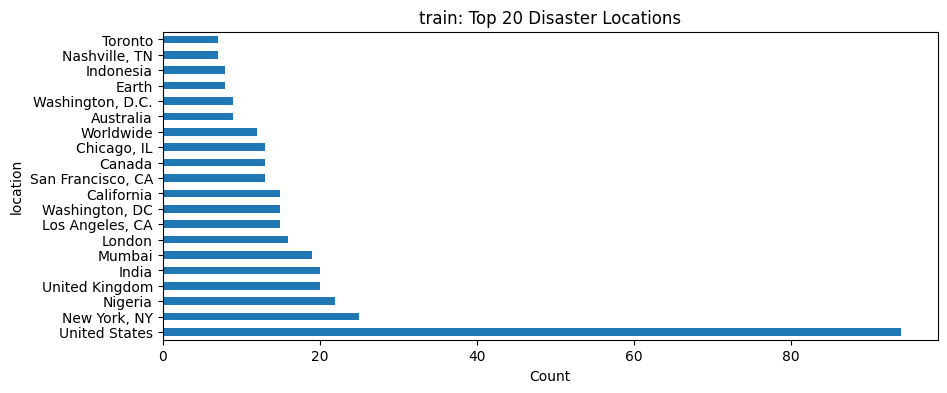

In [103]:
disaster_tweets = train[(train['target']==1)]
#top 20 disaster locations
disaster_tweets.location.value_counts()[1:].head(20).plot(kind='barh', title='train: Top 20 Disaster Locations', xlabel='Count',figsize=(10, 4))

<Axes: title={'center': 'test: Top 20 Disaster Locations'}, xlabel='Count', ylabel='location'>

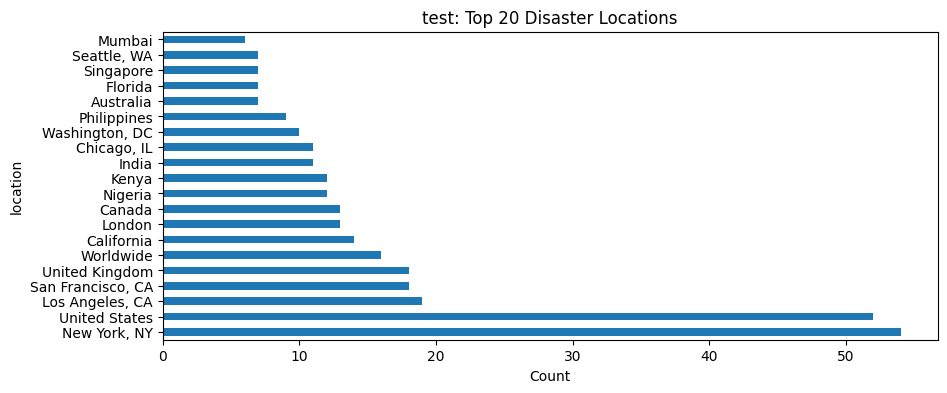

In [104]:
test.location.value_counts()[1:].head(20).plot(kind='barh', title='test: Top 20 Disaster Locations', xlabel='Count',figsize=(10, 4))

15 of the top 20 locations in the dataset, test, are identified as being top 20 loactions for disaster-classified tweets in the labeled train set.

<Axes: title={'center': 'train: Top 40 Disaster Keywords'}, xlabel='Count', ylabel='keyword'>

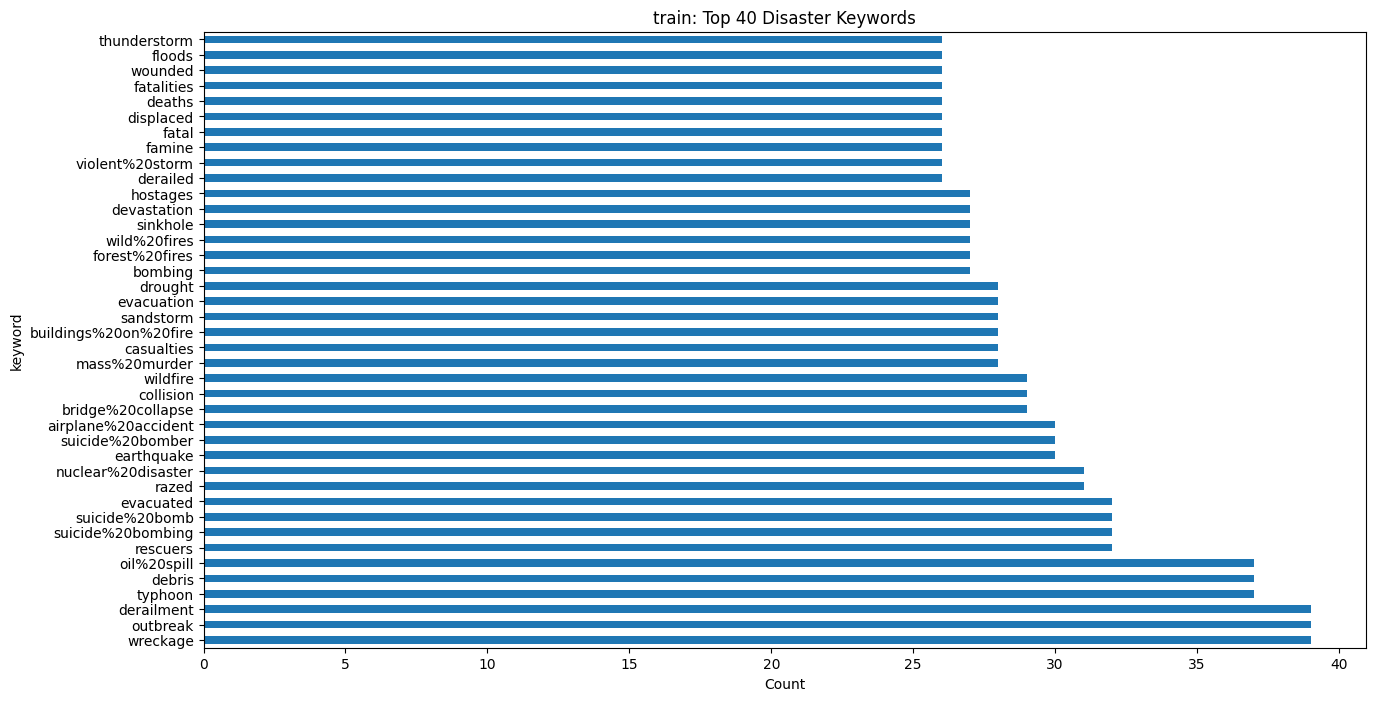

In [88]:
#top 40 disaster keywords
disaster_tweets = train[(train['target']==1)]
disaster_tweets.keyword.value_counts()[1:].head(40).plot(kind='barh', title='train: Top 40 Disaster Keywords', xlabel='Count',figsize=(15, 8))

<Axes: title={'center': 'test: Top 40 Keywords'}, xlabel='Count', ylabel='keyword'>

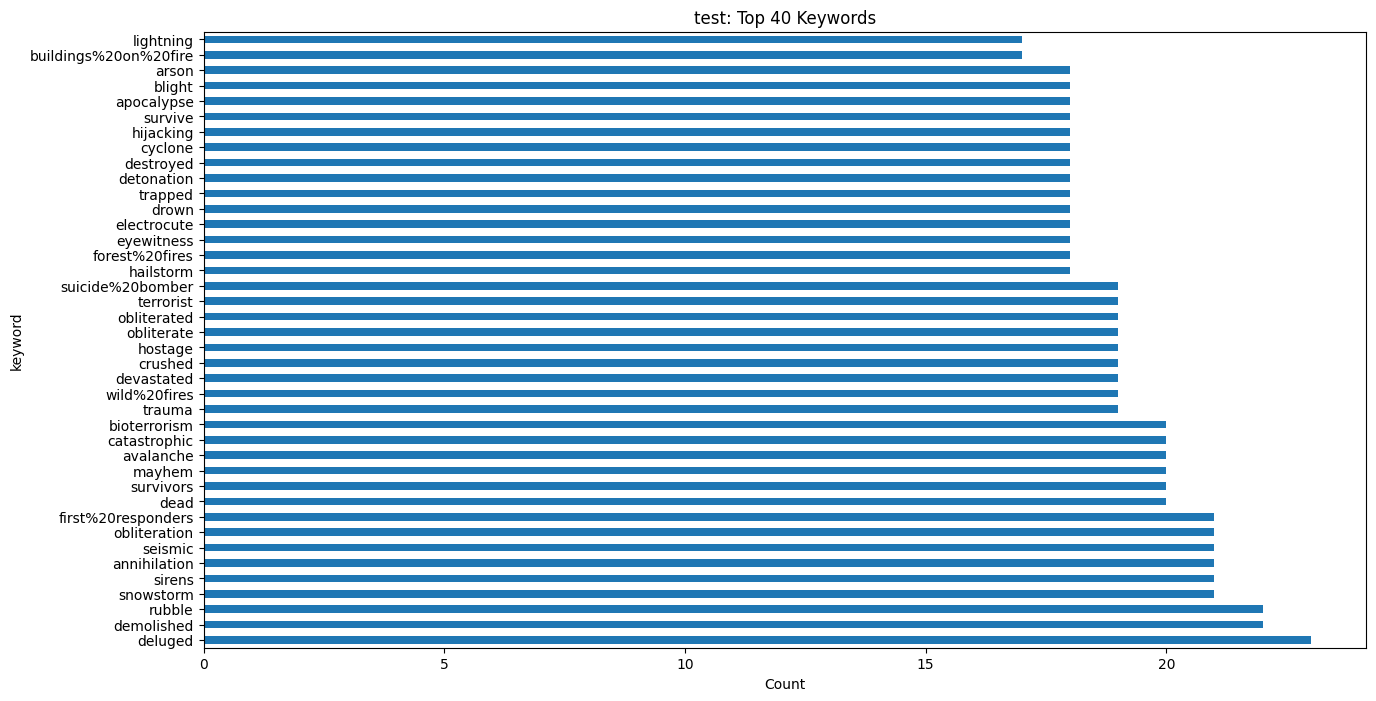

In [105]:
test.keyword.value_counts()[1:].head(40).plot(kind='barh', title='test: Top 40 Keywords', xlabel='Count',figsize=(15, 8))

### Preprocess Data

In order for machine learning algorithms to understand and process the disaster tweets data, it needs to be preprocessed.  

Preprocessing will include three steps:
1. Cleaning the train & test data,
2. Creating the training and validation splits, and
3. Generating discrete features from the tweets using Bag of Words

#### 1. Cleaning the train & test data

Cleaning the tweet data will include converting the text to a string, replacing URLs and usernames with keywords, removing punctuation marks and converting text to lowercase:

In [75]:
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)
lemmatizer = WordNetLemmatizer()

def remove_contraxns(text: str):
    result = re.sub("won't", ' will not', text)
    result = re.sub("can't", ' can not', text)
    result = re.sub("n't", ' not', text)
    result = re.sub("'m", ' am', text)
    result = re.sub("'re", ' are', text)
    result = re.sub("'ve", ' have', text)
    result = re.sub("'ll", ' will', text)
    result = re.sub("'d", ' would', text)
    result = re.sub("'s", ' ', text)
    return result

#source: https://blog.ekbana.com/pre-processing-text-in-python-ad13ea544dae
def preprocess_text(text):
    CLEANR = re.compile("<.*?>:") 
    text = remove_contraxns(text)
    text = re.sub(CLEANR, ' ', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL', text) #remove url links
    text = re.sub('@[^\s]+','USER', text)
    text = re.sub('<[^<]+?>','', text) #remove html tags
    text = ''.join(c for c in text if not c.isdigit()) #remove numbers
    text = text.lower().replace("ё", "е")
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +',' ', text)
    #text = [spell(w) for w in (nltk.word_tokenize(text))] #autocorrect spelling
    text = ' '.join([word for word in text.split() if word not in stopwords_dict])
    word_list = nltk.word_tokenize(text)
    text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return text

train['text_preprocessed'] = train['text'].apply(preprocess_text)
train['keyword_preprocessed'] = train['keyword'].apply(preprocess_text)
test['text_preprocessed'] = test['text'].apply(preprocess_text)
test['keyword_preprocessed'] = test['keyword'].apply(preprocess_text)


In [10]:
train.head()

,id,keyword,location,text,target,text_preprocessed,keyword_preprocessed
0,1,unknown,unknown,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,unknown
1,4,unknown,unknown,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,unknown
2,5,unknown,unknown,All residents asked to 'shelter in place' are ...,1,resident asked helter place notified officer e...,unknown
3,6,unknown,unknown,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,unknown
4,7,unknown,unknown,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,unknown


In [11]:
train.drop(['keyword','text'], axis=1, inplace=True) 
test.drop(['keyword','text'], axis=1, inplace=True)
train.head()

,id,location,target,text_preprocessed,keyword_preprocessed
0,1,unknown,1,deed reason earthquake may allah forgive u,unknown
1,4,unknown,1,forest fire near la ronge sask canada,unknown
2,5,unknown,1,resident asked helter place notified officer e...,unknown
3,6,unknown,1,people receive wildfire evacuation order calif...,unknown
4,7,unknown,1,got sent photo ruby alaska smoke wildfire pour...,unknown


In [12]:
train.sample(n=5)

,id,location,target,text_preprocessed,keyword_preprocessed
2615,3753,Valle Del Sol,0,user greed fuel self destruction takecare,destruction
6634,9501,unknown,0,medium pakistan covered capture terrorist moha...,terrorist
7005,10042,Galapa / AtlÌÁntico,0,listening llegaste tu twister el rey,twister
3057,4385,Desde Republica Argentina,0,sismo km nne geyser california time utc url c,earthquake
4623,6571,unknown,1,incident injury inner loop exit md georgia ave...,injury


In [13]:
test.head()

,id,location,text_preprocessed,keyword_preprocessed
0,0,unknown,happened terrible car crash,unknown
1,2,unknown,heard earthquake different city stay safe ever...,unknown
2,3,unknown,forest fire spot pond goose fleeing across str...,unknown
3,9,unknown,apocalypse lighting spokane wildfire,unknown
4,11,unknown,typhoon soudelor kill china taiwan,unknown


#### 2. Creating the training and validation Splits

train_test_split will be used to split the dataset, train, into the training and testing sets that will be used to train and evaluate classifiers. The following parameter values will be used:

test_size=0.20 (This defines the train:val ratio to be 80:20)

stratify=train.target: (To help minimize bias, training and val sets will be split in a stratified manner using target.) 

In [76]:
# Split the dataset into training and testing sets with stratification
X_train, X_val, y_train, y_val = train_test_split(train.drop('target', axis=1) , train['target'], test_size=0.2, random_state=416, stratify=train['target'])
print('Original dataset shape', Counter(train['target']))
print('train dataset shape', Counter(y_train))

Original dataset shape Counter({0: 4342, 1: 3271})
train dataset shape Counter({0: 3473, 1: 2617})


In [203]:
X_val.head()

,id,location,text_preprocessed,keyword_preprocessed
4949,7053,? miranda ? 521 mi,user im sorry meltdown last night lmao getting...,meltdown
1851,2661,"Cleveland, Ohio",woman crush wedneday go beautiful user loveyou...,crush
2073,2975,South Stand,user oh fuck sake dead,dead
2092,3006,unknown,vibrator shaped vape done busted,death
4487,6383,The Universe,cont sinjar referring pg document group put to...,hostage


In [213]:
y_val.head()

4949    0
1851    0
2073    0
2092    0
4487    1
Name: target, dtype: int64

#### 3. Generating discrete features from the tweets using Bag of Words

Because machine learning algorithms cannot handle text features directly, text features need to be converted to numerical data. 

This notebook uses the bag of words approach, and each tweet is represented as a row in a matrix, with each word or token in a tweet being represented by a column. 

Specifically, CountVectorizer() turns each tweet into numerical data by building a bag of words representation of X_train.text_preprocessed and X_val.text_preprocessed. The parameter, ngram_range, will be set to (1,3). This means that the function will use sequences of 1, 2, and 3 words to generate word counts. 

In [15]:
vec = CountVectorizer(ngram_range=(1, 3))
X_train_bow = vec.fit_transform(X_train.text_preprocessed)
X_val_bow = vec.transform(X_val.text_preprocessed)

### Train & Evaluate Model

#### Classifier Selection

This is a binary text classification problem. Classifiers used for this kind of classification include: 

Logistic Regression, Random Forest, k-Nearest Neighbors. Support Vector Machine and Naive Bayes

To establish baselines, each classifier will be fitted using the default parameters before performing the hyperparameter tuning.

Per Kaggle, predictions will be measured using F1 Scores. Validation accuracy scores for each classifier will also be recorded. These metrics will serve as a baseline comparison for any improvements yielded during optimization work.

In [77]:
# Baseline classifiers

lr = LogisticRegression()
rf = RandomForestClassifier()
knn= KNeighborsClassifier()
svc = SVC()
nb = MultinomialNB()

classifiers =[lr, rf, knn, svc, nb]

#Dictionery of models and classifier types for ease of reference
classifier_dict={0:'LogisticRegression',1:'Random Forest',2:'KNearestNeighbors', 3:'SVC', 4:'Naive Bayes'}

for classifier in classifiers:
    print(classifier)
    classifier.fit(X_train_bow, y_train)

#compare accuracies and F1 scores
for idx,val in enumerate(classifiers):
    print('\n%s model val accuracy: %.3f' %(classifier_dict[idx],val.score(X_val_bow,y_val)))
    print('%s model val F1 score: %.3f' %(classifier_dict[idx],metrics.f1_score(y_val, val.predict(X_val_bow))))

LogisticRegression()
RandomForestClassifier()
KNeighborsClassifier()
SVC()
MultinomialNB()

LogisticRegression model val accuracy: 0.801
LogisticRegression model val F1 score: 0.740

Random Forest model val accuracy: 0.788
Random Forest model val F1 score: 0.695

KNearestNeighbors model val accuracy: 0.657
KNearestNeighbors model val F1 score: 0.374

SVC model val accuracy: 0.792
SVC model val F1 score: 0.703

Naive Bayes model val accuracy: 0.805
Naive Bayes model val F1 score: 0.756


The scoring metric used to evaluate test predictions in this Kaggle challenge is the F1 Score. The Logistic Regression(), SVC(), and MultinomialNB() classifiers suggest baseline F1 Scores above 70% and validation accuracy scores ~80%. RandomizedSearchCV() will be used to tune these three classifiers' hyperparameters to help identify the best estimator for each classifier and choose the best model(s) for classifying the tweet data..

#### Use RandomizedSearchCV() to Tune Hyperparameters

In [78]:
# models to be compared
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB()
}

# optimization parameters for each of the above models
tuned_params = {
        'LogisticRegression': {
            'max_iter': sp_randInt(500, 750),                      
            'solver': ['lbfgs','newton-cg','sag'],   
            'class_weight': ['balanced'],
            'penalty': ['none', 'l2'],
            'C' :  loguniform(1e-3, 100)}, 
        'SVC': {'kernel': ['rbf', 'poly', 'sigmoid'],'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]},
        'MultinomialNB': {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001),'fit_prior': [True, False]}
        
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

L=[]
L_f1=[]
def fit(input, output, val_input, val_output):
        for model in models.keys():
            print(models[model])
            est = models[model]
            est_params = tuned_params[model]
            rscv = RandomizedSearchCV(estimator=est, param_distributions=est_params, scoring = 'accuracy', cv=cv, n_jobs=-1, random_state=825)
            rscv.fit(input, output)
            y_val_predict = rscv.predict(val_input)
            val_accuracy = accuracy_score(val_output, y_val_predict)
            f1_score = metrics.f1_score(val_output, y_val_predict)
            dat= [est,  rscv.best_score_, val_accuracy, f1_score, rscv.best_estimator_]
            L.append(dat)
            print(L)
            print('RandomizedSearchCV() performance scoring = accuracy:')
            print('%s training accuracy : %.3f'%(est, rscv.best_score_))
            print('%s val accuracy: %.3f' %(est,val_accuracy))
            print('%s F1 score: %.3f' %(est, f1_score))
            print('best estimator: {}'.format(rscv.best_estimator_))
            print(metrics.classification_report(val_output, y_val_predict))
            rscv_f1 = RandomizedSearchCV(estimator=est, param_distributions=est_params, scoring = 'f1', cv=cv, n_jobs=-1, return_train_score=True, random_state=624)
            rscv_f1.fit(input, output)
            y_val_predict_f1 = rscv_f1.predict(val_input)
            y_train_predict_f1= rscv_f1.predict(input)
            val_accuracy_f1 = accuracy_score(val_output, y_val_predict_f1)
            dat_f1= [est, accuracy_score(output, y_train_predict_f1) , val_accuracy_f1, rscv_f1.best_score_, rscv_f1.best_estimator_]
            L_f1.append(dat_f1)
            print('RandomizedSearchCV() performance scoring = f1:')
            print('%s train accuracy: %.3f' %(est,accuracy_score(output, y_train_predict_f1)))
            print('%s val accuracy: %.3f' %(est,val_accuracy_f1))
            print('%s F1 score: %.3f' %(est, rscv_f1.best_score_))
            print('best estimator: {}'.format(rscv_f1.best_estimator_))
            print(metrics.classification_report(val_output, y_val_predict_f1))

model_search = fit(X_train_bow, y_train, X_val_bow, y_val)

LogisticRegression()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.frame

[[LogisticRegression(), 0.7986316365626711, 0.8036769533814839, 0.7510407993338885, LogisticRegression(C=0.39805219032936884, class_weight='balanced', max_iter=608,
                   solver='sag')]]
RandomizedSearchCV() performance scoring = accuracy:
LogisticRegression() training accuracy : 0.799
LogisticRegression() val accuracy: 0.804
LogisticRegression() F1 score: 0.751
best estimator: LogisticRegression(C=0.39805219032936884, class_weight='balanced', max_iter=608,
                   solver='sag')
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.82      0.69      0.75       654

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.frame

RandomizedSearchCV() performance scoring = f1:
LogisticRegression() train accuracy: 0.985
LogisticRegression() val accuracy: 0.795
LogisticRegression() F1 score: 0.747
best estimator: LogisticRegression(C=1.205034749735624, class_weight='balanced', max_iter=537,
                   solver='sag')
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       869
           1       0.81      0.69      0.74       654

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

SVC()
[[LogisticRegression(), 0.7986316365626711, 0.8036769533814839, 0.7510407993338885, LogisticRegression(C=0.39805219032936884, class_weight='balanced', max_iter=608,
                   solver='sag')], [SVC(), 0.7962233169129722, 0.7984241628365069, 0.7360275150472915, SVC(C=100, gamma=0.001, kernel='sigmoid')]]
RandomizedSearchCV() performance scoring = accuracy:
SVC() 

#### Evaluation Metrics

In [81]:
#create dataframes of tuned classifiers and their evaluation metrics
models_performance = pd.DataFrame(L, columns = ['classifier', 'train_accuracy', 'val_accuracy', 'f1_score', 'best_model'])
models_performance_f1 = pd.DataFrame(L_f1, columns = ['classifier', 'train_accuracy', 'val_accuracy', 'f1_score', 'best_model'])

In [82]:
print('RandomizedSearchCV() performance scoring = accuracy: \n')
pd.set_option('display.max_colwidth', None)
models_performance

RandomizedSearchCV() performance scoring = accuracy: 



,classifier,train_accuracy,val_accuracy,f1_score,best_model
0,LogisticRegression(),0.798632,0.803677,0.751041,"LogisticRegression(C=0.39805219032936884, class_weight='balanced', max_iter=608,\n solver='sag')"
1,SVC(),0.796223,0.798424,0.736028,"SVC(C=100, gamma=0.001, kernel='sigmoid')"
2,MultinomialNB(),0.781664,0.804990,0.756358,MultinomialNB(alpha=1)


In [83]:
print('RandomizedSearchCV() performance scoring = f1: \n')
pd.set_option('display.max_colwidth', None)
models_performance_f1

RandomizedSearchCV() performance scoring = f1: 



,classifier,train_accuracy,val_accuracy,f1_score,best_model
0,LogisticRegression(),0.985222,0.795141,0.747032,"LogisticRegression(C=1.205034749735624, class_weight='balanced', max_iter=537,\n solver='sag')"
1,SVC(),0.836453,0.776756,0.708007,"SVC(C=1, gamma=0.1, kernel='sigmoid')"
2,MultinomialNB(),0.976355,0.804990,0.744306,MultinomialNB(alpha=1)


In [84]:
frames = [models_performance, models_performance_f1]
df=pd.concat(frames)
df.sort_values(['f1_score'], ascending=False)
#df.reset_index(drop=False, inplace=True)
#save models_performance output to csv
df.to_csv('models_performance.csv', index = False)
df = pd.read_csv('models_performance.csv')

#### Model Selection

In [85]:
df.sort_values(['f1_score'], ascending=False).head(2)

,classifier,train_accuracy,val_accuracy,f1_score,best_model
2,MultinomialNB(),0.781664,0.804990,0.756358,MultinomialNB(alpha=1)
0,LogisticRegression(),0.798632,0.803677,0.751041,"LogisticRegression(C=0.39805219032936884, class_weight='balanced', max_iter=608,\n solver='sag')"


In [40]:
clf_1 = eval(df.iloc[2]['best_model'])
clf_2 = eval(df.iloc[0]['best_model'])
print('Model 1: ', clf_1)
print('Model 2: ', clf_2)

Model 1:  MultinomialNB(alpha=1)
Model 2:  LogisticRegression(C=0.6877679031820485, class_weight='balanced', max_iter=573,
                   solver='sag')


Model 1 and Model 2 had the highest f1_scores (and subsequently the highest val_accuracy scores) pre-Optimization work: 0.756 and 0.740, respectively. Optimization work did not significantly improve performance of either the F1 score or accuracy metric for the Naive Bayes model. For the Bayesian logistic regression model, performance did improve for the F1 score metric (0.751 vs 0.740).

#### Optimal threshold tuning of logistic regression classifier

The default threshold for the Bayesian logistic regression classifier is 0.5. Further tuning of this model will find the optimal threshold that maximizes the F1 score.

In [44]:
clf_2.fit(X_train_bow, y_train)
# predict probabilities
y_predictions = clf_2.predict_proba(X_val_bow)
# keep probabilities for the positive outcome only
y_predictions = y_predictions[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_val, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.356107, F-Score=0.754


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Threshold tuning reports the optimal threshold as .356 (compared to the default of 0.5) that achieves an F-Measure of about 0.754 (compared to 0.751 pre-threshold tuning). Predictions of the test set wil be made for the Bayesian logistic model at both threshold levels. 

### Make Predictions on test_bow & Create Submission Files

In [47]:
test_bow = vec.transform(test.text_preprocessed)

In [48]:
clf_1.fit(X_train_bow, y_train)
test_predictions_1 = clf_1.predict(test_bow)
test_predictions_2 = clf_2.predict(test_bow)
test_predictions_3 = (clf_2.predict_proba(test_bow)[:, 1] >= 0.356107).astype(int) 

In [49]:
#submission_1 = pd.DataFrame({'id': test.id, 'target': test_predictions_1}).to_csv("submission_1.csv", index=False)
#submission_2 = pd.DataFrame({'id': test.id, 'target': test_predictions_2}).to_csv("submission_2.csv", index=False)
submission_3 = pd.DataFrame({'id': test.id, 'target': test_predictions_3}).to_csv("submission_3.csv", index=False)

submission_1 received an F1 Score of 0.79957 from Kaggle. submission_2 received a score of 0.8014. submission_3's F1 score was 0.78057. 

The Bayesain logistic model with the default threshold level (0.5) performed the best of the three models considered for prediction.

### Challenges and Further Work:

I would like to use  transformer-based approachto build a text classification model for tweet data, However, the computing capacity of my laptop is my limiting factor. My next step, though, would be to use BERT to create a contextual model that captures the representation of each word based on the other words in the sentence rather than building an algorithm of isolated word counts. 